# Project work, All Cyclists during years 2015-2018

## Introduction

My project is focuses on to all cyclists in Helsinki region (Helsinki, Vantaa, Espoo) and their behavior different time of each days. I want to seen how much people uses bicycles to commute between home and work. I'm also interested to know the differences between cities. Cycling have been increasing trend for some years now and it interesting know how many people use bicycle.

## Datasets & datasets preparation

### Fetching datasets from open data web site "Helsinki Region Infoshare"

<html>
    <img src="https://raw.githubusercontent.com/srenoes/ShortCut-HSL-group-work/master/Final_Project_Material_Geonobles_1/Katariina/HkiRegionInfoshare.png"
         alt="Helsinki Region Infoshare" style="width:400px; float:right;">
</html>


The Excel sheet below where downloaded from web-site 

for Helsinki: https://hri.fi/data/en_GB/dataset/helsingin-seudun-pyoralaskennat/

under title: NUMBER OF CYCLISTS IN HELSINKI REGION and file name: Helsingin_pyorailijamaarat.csv behind link "CSV File"

for Vantaa: https://hri.fi/data/en_GB/dataset/vantaan-pyorailijamaarat

under title: NUMBER OF CYCLISTS IN VANTAA and file name: Vantaan_pyorailijamaarat.csv and Vantaan_pyorailijamaarat_2017.csv  behind links "Number of cyclists in Vantaa 2015-16" and "Number of cyclists in Vantaa 2017"

for Espoo: https://hri.fi/data/en_GB/dataset/espoon-pyorailijamaarat

under title: NUMBER OF CYCLISTS IN ESPOO and file name: Espoon_pyorailijamaarat.csv behind link "Number of cyclists in Espoo"

After studing these CSV datasets, it was noticed that datasets are actually Excel table (.xlsx) format. Therefore datasets were directly resaved as Excel table format (.xlsx). Datasets are stored in GitHub repository provided by Sönke Schmachtel (https://github.com/srenoes/ShortCut-HSL-group-work/tree/master/Final_Project_Material_Geonobles_1).

After datasets clean up, those new clean datasets are stored to same GitHub repository.

This Jupyter Notebook is store same repository, with all other Jupyter Notebook by our project team. 

### Import needed libraries

In [1]:
#
# Import libraries
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read excel files into DataFrame from GitHub

In [2]:
#
# Read excel file into DataFrame from GitHub
#

HKI_url = 'https://raw.githubusercontent.com/srenoes/ShortCut-HSL-group-work/master/Final_Project_Material_Geonobles_1/Helsingin_pyorailijamaarat.xlsx'
Vantaa_1_url = 'https://raw.githubusercontent.com/srenoes/ShortCut-HSL-group-work/master/Final_Project_Material_Geonobles_1/Vantaan_pyorailijamaarat.xlsx'
Vantaa_2_url = 'https://raw.githubusercontent.com/srenoes/ShortCut-HSL-group-work/master/Final_Project_Material_Geonobles_1/Vantaan_pyorailijamaarat_2017.xlsx'
Espoo_url = 'https://raw.githubusercontent.com/srenoes/ShortCut-HSL-group-work/master/Final_Project_Material_Geonobles_1/Espoon_pyorailijamaarat.xlsx'

Hki_bikers = pd.read_excel(HKI_url)
Vantaa_bikers_1 = pd.read_excel(Vantaa_1_url)
Vantaa_bikers_2 = pd.read_excel(Vantaa_2_url)
Espoo_bikers = pd.read_excel(Espoo_url)


### Clean Cyclists Datasets

#### General clean up

The most important cleaning action for these datasets are separation of date, time and weekdays into their own columns. Without this those can not be compared in calculations and decision making. After that especially Espoo dataset have several unused columns which have to be dropped out of disturbing dataset handling. After cleaning process Vantaa two separate datasets are merged together for all member of our project group. 

#### Clean up for my project analysis

After general clean up process I start datasets handling for getting statistics into bar chart by cities. For all my analysis I need all measurement points to be added together by date, time and weekdays. At the end all dataset are merged to together for final analysis.

#### Helsinki cyclists dataset

In [3]:
# print out raw dataset: Helsinki cyclists
Hki_bikers

,Päivämäärä,Auroransilta,Eteläesplanadi,Huopalahti (asema),Kaisaniemi/Eläintarhanlahti,Kaivokatu,Kulosaaren silta et.,Kulosaaren silta po.,Kuusisaarentie,"Käpylä, Pohjoisbaana",...,Merikannontie,Munkkiniemen silta eteläpuoli,Munkkiniemi silta pohjoispuoli,Heperian puisto/Ooppera,Pitkäsilta itäpuoli,Pitkäsilta länsipuoli,Lauttasaaren silta pohjoispuoli,Ratapihantie,Viikintie,Baana
0,ke 1 tammi 2014 00:00,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,5.0,3.0,NaN,11.0,NaN,NaN,NaN,8
1,ke 1 tammi 2014 01:00,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,5.0,1.0,NaN,8.0,NaN,NaN,NaN,4
2,ke 1 tammi 2014 02:00,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,14.0,NaN,NaN,NaN,11
3,ke 1 tammi 2014 03:00,NaN,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,2.0,0.0,NaN,7.0,NaN,NaN,NaN,3
4,ke 1 tammi 2014 04:00,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,9.0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51115,to 31 loka 2019 19:00,24.0,60.0,47.0,46.0,104.0,12.0,44.0,20.0,0.0,...,76.0,46.0,18.0,110.0,79.0,45.0,0.0,42.0,NaN,111
51116,to 31 loka 2019 20:00,32.0,51.0,34.0,39.0,71.0,14.0,24.0,12.0,0.0,...,47.0,41.0,27.0,90.0,56.0,41.0,0.0,39.0,NaN,82
51117,to 31 loka 2019 21:00,21.0,23.0,19.0,13.0,62.0,7.0,18.0,14.0,0.0,...,37.0,24.0,16.0,68.0,44.0,37.0,0.0,42.0,NaN,74
51118,to 31 loka 2019 22:00,8.0,13.0,8.0,9.0,34.0,3.0,13.0,8.0,0.0,...,13.0,12.0,8.0,26.0,23.0,9.0,0.0,9.0,NaN,33


In [4]:
#
# rename column names, change ä -> a and ö -> o and translate names from finnish to english
#
Hki_bikers = Hki_bikers.rename({'Päivämäärä': 'Date_tmp', 'Eteläesplanadi': 'Etelaesplanadi', 'Huopalahti (asema)': 'Huopalahti (station)', 'Kaisaniemi/Eläintarhanlahti': 'Kaisaniemi/ Elaintarhanlahti'}, axis=1)
Hki_bikers = Hki_bikers.rename({'Kulosaaren silta et.': 'Kulosaari bridge south', 'Kulosaaren silta po. ': 'Kulosaari bridge north', 'Käpylä, Pohjoisbaana': 'Kapyla, Pohjoisbaana'}, axis=1)
Hki_bikers = Hki_bikers.rename({'Lauttasaaren silta eteläpuoli': 'Lauttasaari bridge south side', 'Munkkiniemen silta eteläpuoli': 'Munkkiniemi bridge south side'}, axis=1)
Hki_bikers = Hki_bikers.rename({'Munkkiniemi silta pohjoispuoli': 'Munkkiniemi bridge north side', 'Heperian puisto/Ooppera': 'Heperia park/Ooppera', 'Pitkäsilta itäpuoli': 'Pitkasilta east side'}, axis=1)
Hki_bikers = Hki_bikers.rename({'Pitkäsilta länsipuoli': 'Pitkasilta west side', 'Lauttasaaren silta pohjoispuoli': 'Lauttasaari bridge north side'}, axis=1)
#
# replace finnish word with english words due to datetime convertion
#
# first names of months
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('tammi', 'Jan')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('helmi', 'Feb')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('maalis', 'Mar')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('huhti', 'Apr')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('touko', 'May')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('kesä', 'Jun')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('heinä', 'Jul')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('elo', 'Aug')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('syys', 'Sep')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('loka', 'Oct')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('marras', 'Nov')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('joulu', 'Dec')
# then names of days
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('ma', 'Mon')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('ti', 'Tue')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('ke', 'Wed')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('to', 'Thu')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('pe', 'Fri')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('la', 'Sat')
Hki_bikers.Date_tmp = Hki_bikers.Date_tmp.str.replace('su', 'Sun')
#
# split weekday and datetime into each own columns
#
weekday = Hki_bikers["Date_tmp"].str.split(" ", n = 1, expand = True)
Hki_bikers.insert(0, 'Weekday', weekday[0])
Hki_bikers.insert(1, 'Date', weekday[1])
Hki_bikers = Hki_bikers.drop(['Date_tmp'], axis=1)
#
# Change date and time to datetime type
#
Hki_bikers.Date = pd.to_datetime(Hki_bikers.Date, format='%d %b %Y %H:%M', errors='coerce')
#
# split date and time to two different columns, this command change values to string type
#
Hki_bikers.insert(2, 'Time', Hki_bikers.Date.dt.strftime('%H:%M:%S'))
Hki_bikers.Date = Hki_bikers.Date.dt.strftime('%Y-%m-%d')
#
# change date column back datetime -value
#
Hki_bikers.Date = pd.to_datetime(Hki_bikers.Date, format='%Y-%m-%d', errors='coerce')


#### Vantaa cyclists datasets

In [5]:
# print out raw dataset: Vantaa cyclists
Vantaa_bikers_1

,Päivämäärä,Asolanväylä P,Asolanväylä E,Hakunilantie P,Hakunilantie E,Kyytitie I,Kyytitie L,Kaislaranta P,Kaislaranta E,Kuusijärvi P,...,Simonkyläntie P,Simonkyläntie E,Solkikuja I,Solkikuja L,Vanha Porvoontie P,Vanha Porvoontie E,Vantaanlaaksontie P,Vantaanlaaksontie E,Ylästöntie I,Ylästöntie L
0,torstai 1.1.2015 0:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,torstai 1.1.2015 1:00,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,torstai 1.1.2015 2:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,torstai 1.1.2015 3:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,torstai 1.1.2015 4:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,lauantai 31.12.2016 19:00,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17540,lauantai 31.12.2016 20:00,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17541,lauantai 31.12.2016 21:00,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17542,lauantai 31.12.2016 22:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# print out dataset: Vantaa cyclists
Vantaa_bikers_2

,Päivämäärä,Kielotie länsi,Kuusijärvi,Kytöpuisto,Pellas,Ylästöntie itä,Talvikkitie-Lummetie,Urpiaisentie,Kielotie_ita,Kyytitie
0,2017-07-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-07-12 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-07-12 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-07-12 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-07-12 04:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12907,2018-12-31 19:00:00,3.0,0.0,3.0,1.0,2.0,1.0,0.0,0.0,1.0
12908,2018-12-31 20:00:00,4.0,1.0,1.0,3.0,2.0,2.0,0.0,3.0,1.0
12909,2018-12-31 21:00:00,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0
12910,2018-12-31 22:00:00,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0


In [7]:
#
# ### ### ###    Vantaa_bikers_1    ### ### ###
#
# rename column names, change ä -> a and ö -> o
Vantaa_bikers_1 = Vantaa_bikers_1.rename({'Päivämäärä': 'Date_tmp', 'Asolanväylä P': 'Asolanvayla P', 'Asolanväylä E': 'Asolanvayla E'}, axis=1)
Vantaa_bikers_1 = Vantaa_bikers_1.rename({'Kuusijärvi P': 'Kuusijarvi P', 'Kuusijärvi E': 'Kuusijarvi E', 'Kytöpuisto P': 'Kytopuisto P', 'Ylästöntie I':'Ylastontie I'}, axis=1)
Vantaa_bikers_1 = Vantaa_bikers_1.rename({'Ylästöntie L': 'Ylastontie L', 'Simonkyläntie P':'Simonkylantie P', 'Simonkyläntie E':'Simonkylantie E'}, axis=1)
#
# replace finnish word with english words due to datetime convertion
#
Vantaa_bikers_1['Date_tmp'] = Vantaa_bikers_1.Date_tmp.str.replace('maanantai', 'Mon')
Vantaa_bikers_1['Date_tmp'] = Vantaa_bikers_1.Date_tmp.str.replace('tiistai', 'Tue')
Vantaa_bikers_1['Date_tmp'] = Vantaa_bikers_1.Date_tmp.str.replace('keskiviikko', 'Wed')
Vantaa_bikers_1['Date_tmp'] = Vantaa_bikers_1.Date_tmp.str.replace('torstai', 'Thu')
Vantaa_bikers_1['Date_tmp'] = Vantaa_bikers_1.Date_tmp.str.replace('perjantai', 'Fri')
Vantaa_bikers_1['Date_tmp'] = Vantaa_bikers_1.Date_tmp.str.replace('lauantai', 'Sat')
Vantaa_bikers_1['Date_tmp'] = Vantaa_bikers_1.Date_tmp.str.replace('sunnuntai', 'Sun')
#
# split weekday and datetime into each own columns
#
weekday = Vantaa_bikers_1["Date_tmp"].str.split(" ", n = 1, expand = True)
Vantaa_bikers_1.insert(0, 'Weekday', weekday[0])
Vantaa_bikers_1.insert(1, 'Date', weekday[1])
Vantaa_bikers_1 = Vantaa_bikers_1.drop(['Date_tmp'], axis=1)
#
# Change date and time to datetime type
#
Vantaa_bikers_1.Date = pd.to_datetime(Vantaa_bikers_1.Date, format='%d.%m.%Y %H:%M', errors='coerce')
#
# split date and time to two different columns, this command change value to string
#
Vantaa_bikers_1.insert(2, 'Time', Vantaa_bikers_1.Date.dt.strftime('%H:%M:%S'))
Vantaa_bikers_1.Date = Vantaa_bikers_1.Date.dt.strftime('%Y-%m-%d')
#
# change date back datetime -value
#
Vantaa_bikers_1.Date = pd.to_datetime(Vantaa_bikers_1.Date, format='%Y-%m-%d', errors='coerce')
#
#
# ### ### ###    Vantaa_bikers_2    ### ### ###
#
# rename column names, change ä -> a and ö -> o
Vantaa_bikers_2 = Vantaa_bikers_2.rename({'Päivämäärä': 'Date', 'Kielotie länsi': 'Kielotie lansi', 'Kuusijärvi': 'Kuusijarvi'}, axis=1)
Vantaa_bikers_2 = Vantaa_bikers_2.rename({'Kuusijärvi': 'Kuusijarvi', 'Kytöpuisto': 'Kytopuisto', 'Ylästöntie itä':'Ylastontie ita'}, axis=1)
#
# split date and time to two different columns, this command change value to string
#
Vantaa_bikers_2.insert(1, 'Time', Vantaa_bikers_2.Date.dt.strftime('%H:%M:%S'))
Vantaa_bikers_2.Date = Vantaa_bikers_2.Date.dt.strftime('%Y-%m-%d')
#
# change date back datetime -value
#
Vantaa_bikers_2.Date = pd.to_datetime(Vantaa_bikers_2.Date, format='%Y-%m-%d', errors='coerce')
#
# add missing weekdays to dataset
#
Vantaa_bikers_2.insert(0, 'Weekday', Vantaa_bikers_2.Date.dt.day_name())
Vantaa_bikers_2['Weekday'] = Vantaa_bikers_2.Weekday.str.replace('Monday', 'Mon')
Vantaa_bikers_2['Weekday'] = Vantaa_bikers_2.Weekday.str.replace('Tuesday', 'Tue')
Vantaa_bikers_2['Weekday'] = Vantaa_bikers_2.Weekday.str.replace('Wednesday', 'Wed')
Vantaa_bikers_2['Weekday'] = Vantaa_bikers_2.Weekday.str.replace('Thursday', 'Thu')
Vantaa_bikers_2['Weekday'] = Vantaa_bikers_2.Weekday.str.replace('Friday', 'Fri')
Vantaa_bikers_2['Weekday'] = Vantaa_bikers_2.Weekday.str.replace('Saturday', 'Sat')
Vantaa_bikers_2['Weekday'] = Vantaa_bikers_2.Weekday.str.replace('Sunday', 'Sun')
# Vantaa_bikers_2

#
# merge both Vantaa datasets together
#
DataFrames = [Vantaa_bikers_1, Vantaa_bikers_2]
Vantaa_bikers_all = pd.concat(DataFrames, ignore_index=True, sort=False)


#### Espoo cyclists dataset

In [8]:
# print out raw dataset: Espoo cyclists
Espoo_bikers

,Päivä,Päivämäärä,Aika,Espoon portti (Eco-Counter),Espoonlahdenraitti (Eco-Counter),Gallen-Kallela (Eco-Counter),Gallen-Kallelan tie (DSL10),Haukilahti (Viacount),Kalevalantien alikulku (DSL10),"Kehä I, Laajalahti (DSL10)",...,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135
0,pe,2014-01-03,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,pe,2014-01-03,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,pe,2014-01-03,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,pe,2014-01-03,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,pe,2014-01-03,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38011,NaN,2019-05-13,19:00:00,69.0,NaN,56.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
38012,NaN,2019-05-13,20:00:00,76.0,NaN,54.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
38013,NaN,2019-05-13,21:00:00,46.0,NaN,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
38014,NaN,2019-05-13,22:00:00,25.0,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [9]:
#
# drop unnamed columns away, those columns are all empty
#
i = 43
for x in range(len(Espoo_bikers.columns)-43):
    name = 'Unnamed: {}'.format(i)
    Espoo_bikers = Espoo_bikers.drop([name], axis=1)
    i += 1
#
# rename columns' column names, change ä -> a and ö -> o
#
Espoo_bikers = Espoo_bikers.rename({'Päivä': 'Weekday', 'Päivämäärä': 'Date', 'Aika':'Time', 'Keskuspuisto, etelähaara, itä (Viacount 2)': 'Keskuspuisto, etelahaara, ita (Viacount 2)', 'Keskuspuisto, etelähaara, länsi (Viacount 2)': 'Keskuspuisto, etelahaara, lansi (Viacount 2)'}, axis=1)
Espoo_bikers = Espoo_bikers.rename({'Keskuspuisto, Grimängen (Viacount 2)': 'Keskuspuisto, Grimangen (Viacount 2)', 'Keskuspuisto, Mössenkär (Viacount 2)': 'Keskuspuisto, Mossenkar (Viacount 2)'}, axis=1)
Espoo_bikers = Espoo_bikers.rename({'Kiltaraitti, etelä (Viacount 2)': 'Kiltaraitti, etela (Viacount 2)', 'Kirkkojärventie (DSL10)': 'Kirkkojarventie (DSL10)', 'Länsiväylä (Eco-counter)': 'Lansivayla (Eco-counter)'}, axis=1)
Espoo_bikers = Espoo_bikers.rename({'Länsiväylä, Karhusaari (DSL10)': 'Lansivayla, Karhusaari (DSL10)', 'Pitkäjärventie (DSL10)': 'Pitkajarventie (DSL10)', 'Päivänkestämönpolku, Kera (Eco-Counter)': 'Paivankestamonpolku, Kera (Eco-Counter)'}, axis=1)
Espoo_bikers = Espoo_bikers.rename({'Suomenlahdentie, eteläinen (viacount)': 'Suomenlahdentie, etelainen (viacount)', 'Tapiola,Länsituulenkuja (Eco-Counter)': 'Tapiola,Lansituulenkuja (Eco-Counter)', 'Vihdintie, Kalajärven itäpuoli (Viacount 2)': 'Vihdintie, Kalajarven itapuoli (Viacount 2)'}, axis=1)
Espoo_bikers = Espoo_bikers.rename({'Vihdintie, Uusmäki (DSL10)': 'Vihdintie, Uusmaki (DSL10)', 'Ylismäentie,Suurpelto (Eco-Counter)': 'Ylismaentie,Suurpelto (Eco-Counter)'}, axis=1)
Espoo_bikers = Espoo_bikers.rename({'Kehä I, Laajalahti (DSL10)': 'Keha I, Laajalahti (DSL10)', 'Kehä I, Laajalahti (Eco-counter)': 'Keha I, Laajalahti (Eco-counter)'}, axis=1)
#
# replace finnish word with english words due to datetime convertion
#
Espoo_bikers.Weekday = Espoo_bikers.Weekday.str.replace('ma', 'Mon')
Espoo_bikers.Weekday = Espoo_bikers.Weekday.str.replace('ti', 'Tue')
Espoo_bikers.Weekday = Espoo_bikers.Weekday.str.replace('ke', 'Wed')
Espoo_bikers.Weekday = Espoo_bikers.Weekday.str.replace('to', 'Thu')
Espoo_bikers.Weekday = Espoo_bikers.Weekday.str.replace('pe', 'Fri')
Espoo_bikers.Weekday = Espoo_bikers.Weekday.str.replace('la', 'Sat')
Espoo_bikers.Weekday = Espoo_bikers.Weekday.str.replace('su', 'Sun')
#
# add missing weekdays to dataset
#
Espoo_bikers['Weekday'] = Espoo_bikers.Date.dt.day_name()
Espoo_bikers['Weekday'] = Espoo_bikers.Weekday.str.replace('Monday', 'Mon')
Espoo_bikers['Weekday'] = Espoo_bikers.Weekday.str.replace('Tuesday', 'Tue')
Espoo_bikers['Weekday'] = Espoo_bikers.Weekday.str.replace('Wednesday', 'Wed')
Espoo_bikers['Weekday'] = Espoo_bikers.Weekday.str.replace('Thursday', 'Thu')
Espoo_bikers['Weekday'] = Espoo_bikers.Weekday.str.replace('Friday', 'Fri')
Espoo_bikers['Weekday'] = Espoo_bikers.Weekday.str.replace('Saturday', 'Sat')
Espoo_bikers['Weekday'] = Espoo_bikers.Weekday.str.replace('Sunday', 'Sun')
#
# split date and time to two different columns, this command change value to string
#
Espoo_bikers.insert(2, 'apu', pd.to_datetime(Espoo_bikers.Time, format='%H:%M:%S', errors='coerce'))
Espoo_bikers.insert(2, 'Time2', Espoo_bikers.apu.dt.strftime('%H:%M:%S'))
Espoo_bikers = Espoo_bikers.drop(['apu'], axis=1)
Espoo_bikers = Espoo_bikers.drop(['Time'], axis=1)
Espoo_bikers = Espoo_bikers.rename({'Time2': 'Time'}, axis=1)


## Write clean datasets into CSV file

After saving datasets into CSV files, there are stored to shared GitHub repository (mentioned at the beginning). All project member are using these cleaned datasets and make their own data analysis of them.

In [10]:
Hki_bikers.to_csv(r'HelsinkiBikers_cleanDataset.csv', index = False)
Vantaa_bikers_all.to_csv(r'VantaaBikers_cleanDataset.csv', index = False)
Espoo_bikers.to_csv(r'EspooBikers_cleanDataset.csv', index = False)


## Read clean datasets from CSV file into DataFrame

Read CSV file into DataFrame from shared GitHub repository

In [11]:
#
# Read CSV file into DataFrame from shared GitHub repository
#

HKI_url = 'https://raw.githubusercontent.com/srenoes/ShortCut-HSL-group-work/master/Final_Project_Material_Geonobles_1/HelsinkiBikers_cleanDataset.csv'
Vantaa_url = 'https://raw.githubusercontent.com/srenoes/ShortCut-HSL-group-work/master/Final_Project_Material_Geonobles_1/VantaaBikers_cleanDataset.csv'
Espoo_url = 'https://raw.githubusercontent.com/srenoes/ShortCut-HSL-group-work/master/Final_Project_Material_Geonobles_1/EspooBikers_cleanDataset.csv'

Hki_bikers_all = pd.read_csv(HKI_url)
Vantaa_bikers_all = pd.read_csv(Vantaa_url)
Espoo_bikers_all = pd.read_csv(Espoo_url)

## Combine datasets

Each dataset is modified by calculating all measurement points together by cities. Every day's measurement are first stored their own individual tables by weekdays. This way I am able to do bar chart for each weekdays and see cyclists count every hour.

### Create weekdays datasets

#### Helsinki weekdays

In [12]:
#
# Select years 2015-2018
#
Hki_bikers= Hki_bikers_all.loc[Hki_bikers_all.Date.between('2015-01-01','2018-12-31')]
#
# Create own table for each weekday
#
Mon_days_H = Hki_bikers[(Hki_bikers['Weekday'] == 'Mon')]
Mon_days_H = Mon_days_H.drop(['Date'], axis=1)
Tue_days_H = Hki_bikers[(Hki_bikers['Weekday'] == 'Tue')]
Tue_days_H = Tue_days_H.drop(['Date'], axis=1)
Wed_days_H = Hki_bikers[(Hki_bikers['Weekday'] == 'Wed')]
Wed_days_H = Wed_days_H.drop(['Date'], axis=1)
Thu_days_H = Hki_bikers[(Hki_bikers['Weekday'] == 'Thu')]
Thu_days_H = Thu_days_H.drop(['Date'], axis=1)
Fri_days_H = Hki_bikers[(Hki_bikers['Weekday'] == 'Fri')]
Fri_days_H = Fri_days_H.drop(['Date'], axis=1)
Sat_days_H = Hki_bikers[(Hki_bikers['Weekday'] == 'Sat')]
Sat_days_H = Sat_days_H.drop(['Date'], axis=1)
Sun_days_H = Hki_bikers[(Hki_bikers['Weekday'] == 'Sun')]
Sun_days_H = Sun_days_H.drop(['Date'], axis=1)

# Mondays
Mon_days_H = Mon_days_H.drop(['Weekday'], axis=1)
Mon_days_H_gb = Mon_days_H.groupby('Time')
Mon_days_H_gb = Mon_days_H_gb.sum(axis=0)
# Tuesdays
Tue_days_H = Tue_days_H.drop(['Weekday'], axis=1)
Tue_days_H_gb = Tue_days_H.groupby('Time')
Tue_days_H_gb = Tue_days_H_gb.sum(axis=0)
# Wednesdays
Wed_days_H = Wed_days_H.drop(['Weekday'], axis=1)
Wed_days_H_gb = Wed_days_H.groupby('Time')
Wed_days_H_gb = Wed_days_H_gb.sum(axis=0)
# Thursdays
Thu_days_H = Thu_days_H.drop(['Weekday'], axis=1)
Thu_days_H_gb = Thu_days_H.groupby('Time')
Thu_days_H_gb = Thu_days_H_gb.sum(axis=0)
# Fridays
Fri_days_H = Fri_days_H.drop(['Weekday'], axis=1)
Fri_days_H_gb = Fri_days_H.groupby('Time')
Fri_days_H_gb = Fri_days_H_gb.sum(axis=0)
# Saturdays
Sat_days_H = Sat_days_H.drop(['Weekday'], axis=1)
Sat_days_H_gb = Sat_days_H.groupby('Time')
Sat_days_H_gb = Sat_days_H_gb.sum(axis=0)
# Sundays
Sun_days_H = Sun_days_H.drop(['Weekday'], axis=1)
Sun_days_H_gb = Sun_days_H.groupby('Time')
Sun_days_H_gb = Sun_days_H_gb.sum(axis=0)

#### Vantaa weekdays

In [13]:
#
# Select years 2015-2018
#
Vantaa_bikers= Vantaa_bikers_all.loc[Vantaa_bikers_all.Date.between('2015-01-01','2018-12-31')] 
#
# Create own table for each weekday
#
Mon_days_V = Vantaa_bikers[(Vantaa_bikers['Weekday'] == 'Mon')]
Mon_days_V = Mon_days_V.drop(['Date'], axis=1)
Tue_days_V = Vantaa_bikers[(Vantaa_bikers['Weekday'] == 'Tue')]
Tue_days_V = Tue_days_V.drop(['Date'], axis=1)
Wed_days_V = Vantaa_bikers[(Vantaa_bikers['Weekday'] == 'Wed')]
Wed_days_V = Wed_days_V.drop(['Date'], axis=1)
Thu_days_V = Vantaa_bikers[(Vantaa_bikers['Weekday'] == 'Thu')]
Thu_days_V = Thu_days_V.drop(['Date'], axis=1)
Fri_days_V = Vantaa_bikers[(Vantaa_bikers['Weekday'] == 'Fri')]
Fri_days_V = Fri_days_V.drop(['Date'], axis=1)
Sat_days_V = Vantaa_bikers[(Vantaa_bikers['Weekday'] == 'Sat')]
Sat_days_V = Sat_days_V.drop(['Date'], axis=1)
Sun_days_V = Vantaa_bikers[(Vantaa_bikers['Weekday'] == 'Sun')]
Sun_days_V = Sun_days_V.drop(['Date'], axis=1)

# Mondays
Mon_days_V = Mon_days_V.drop(['Weekday'], axis=1)
Mon_days_V_gb = Mon_days_V.groupby('Time')
Mon_days_V_gb = Mon_days_V_gb.sum(axis=0)
# Tuesdays
Tue_days_V = Tue_days_V.drop(['Weekday'], axis=1)
Tue_days_V_gb = Tue_days_V.groupby('Time')
Tue_days_V_gb = Tue_days_V_gb.sum(axis=0)
# Wednesdays
Wed_days_V = Wed_days_V.drop(['Weekday'], axis=1)
Wed_days_V_gb = Wed_days_V.groupby('Time')
Wed_days_V_gb = Wed_days_V_gb.sum(axis=0)
# Thursdays
Thu_days_V = Thu_days_V.drop(['Weekday'], axis=1)
Thu_days_V_gb = Thu_days_V.groupby('Time')
Thu_days_V_gb = Thu_days_V_gb.sum(axis=0)
# Fridays
Fri_days_V = Fri_days_V.drop(['Weekday'], axis=1)
Fri_days_V_gb = Fri_days_V.groupby('Time')
Fri_days_V_gb = Fri_days_V_gb.sum(axis=0)
# Saturdays
Sat_days_V = Sat_days_V.drop(['Weekday'], axis=1)
Sat_days_V_gb = Sat_days_V.groupby('Time')
Sat_days_V_gb = Sat_days_V_gb.sum(axis=0)
# Sundays
Sun_days_V = Sun_days_V.drop(['Weekday'], axis=1)
Sun_days_V_gb = Sun_days_V.groupby('Time')
Sun_days_V_gb = Sun_days_V_gb.sum(axis=0)

#### Espoo weekdays

In [14]:
#
# Select years 2015-2018
#
Espoo_bikers= Espoo_bikers_all.loc[Espoo_bikers_all.Date.between('2015-01-01','2018-12-31')]
#
# Create own table for each weekday
#
Mon_days_E = Espoo_bikers[(Espoo_bikers['Weekday'] == 'Mon')]
Mon_days_E = Mon_days_E.drop(['Date'], axis=1)
Tue_days_E = Espoo_bikers[(Espoo_bikers['Weekday'] == 'Tue')]
Tue_days_E = Tue_days_E.drop(['Date'], axis=1)
Wed_days_E = Espoo_bikers[(Espoo_bikers['Weekday'] == 'Wed')]
Wed_days_E = Wed_days_E.drop(['Date'], axis=1)
Thu_days_E = Espoo_bikers[(Espoo_bikers['Weekday'] == 'Thu')]
Thu_days_E = Thu_days_E.drop(['Date'], axis=1)
Fri_days_E = Espoo_bikers[(Espoo_bikers['Weekday'] == 'Fri')]
Fri_days_E = Fri_days_E.drop(['Date'], axis=1)
Sat_days_E = Espoo_bikers[(Espoo_bikers['Weekday'] == 'Sat')]
Sat_days_E = Sat_days_E.drop(['Date'], axis=1)
Sun_days_E = Espoo_bikers[(Espoo_bikers['Weekday'] == 'Sun')]
Sun_days_E = Sun_days_E.drop(['Date'], axis=1)

# Mondays
Mon_days_E = Mon_days_E.drop(['Weekday'], axis=1)
Mon_days_E_gb = Mon_days_E.groupby('Time')
Mon_days_E_gb = Mon_days_E_gb.sum(axis=0)
# Tuesdays
Tue_days_E = Tue_days_E.drop(['Weekday'], axis=1)
Tue_days_E_gb = Tue_days_E.groupby('Time')
Tue_days_E_gb = Tue_days_E_gb.sum(axis=0)
# Wednesdays
Wed_days_E = Wed_days_E.drop(['Weekday'], axis=1)
Wed_days_E_gb = Wed_days_E.groupby('Time')
Wed_days_E_gb = Wed_days_E_gb.sum(axis=0)
# Thursdays
Thu_days_E = Thu_days_E.drop(['Weekday'], axis=1)
Thu_days_E_gb = Thu_days_E.groupby('Time')
Thu_days_E_gb = Thu_days_E_gb.sum(axis=0)
# Fridays
Fri_days_E = Fri_days_E.drop(['Weekday'], axis=1)
Fri_days_E_gb = Fri_days_E.groupby('Time')
Fri_days_E_gb = Fri_days_E_gb.sum(axis=0)
# Saturdays
Sat_days_E = Sat_days_E.drop(['Weekday'], axis=1)
Sat_days_E_gb = Sat_days_E.groupby('Time')
Sat_days_E_gb = Sat_days_E_gb.sum(axis=0)
# Sundays
Sun_days_E = Sun_days_E.drop(['Weekday'], axis=1)
Sun_days_E_gb = Sun_days_E.groupby('Time')
Sun_days_E_gb = Sun_days_E_gb.sum(axis=0)

### Combine all measurement points together (sum of them)

In [15]:
#### Helsinki ####

Mon_days_H_gb = Mon_days_H_gb.sum(axis=1)
Tue_days_H_gb = Tue_days_H_gb.sum(axis=1)
Wed_days_H_gb = Wed_days_H_gb.sum(axis=1)
Thu_days_H_gb = Thu_days_H_gb.sum(axis=1)
Fri_days_H_gb = Fri_days_H_gb.sum(axis=1)
Sat_days_H_gb = Sat_days_H_gb.sum(axis=1)
Sun_days_H_gb = Sun_days_H_gb.sum(axis=1)

#### Vantaa ####

Mon_days_V_gb = Mon_days_V_gb.sum(axis=1)
Tue_days_V_gb = Tue_days_V_gb.sum(axis=1)
Wed_days_V_gb = Wed_days_V_gb.sum(axis=1)
Thu_days_V_gb = Thu_days_V_gb.sum(axis=1)
Fri_days_V_gb = Fri_days_V_gb.sum(axis=1)
Sat_days_V_gb = Sat_days_V_gb.sum(axis=1)
Sun_days_V_gb = Sun_days_V_gb.sum(axis=1)

#### Espoo ####

Mon_days_E_gb = Mon_days_E_gb.sum(axis=1)
Tue_days_E_gb = Tue_days_E_gb.sum(axis=1)
Wed_days_E_gb = Wed_days_E_gb.sum(axis=1)
Thu_days_E_gb = Thu_days_E_gb.sum(axis=1)
Fri_days_E_gb = Fri_days_E_gb.sum(axis=1)
Sat_days_E_gb = Sat_days_E_gb.sum(axis=1)
Sun_days_E_gb = Sun_days_E_gb.sum(axis=1)

## Visualizing

I want to show the behavior of the cyclists first by cities and then all cities together.

### Combine Helsinki data together and show bar chart of Helsinki cyclists to comparing to total bar chart

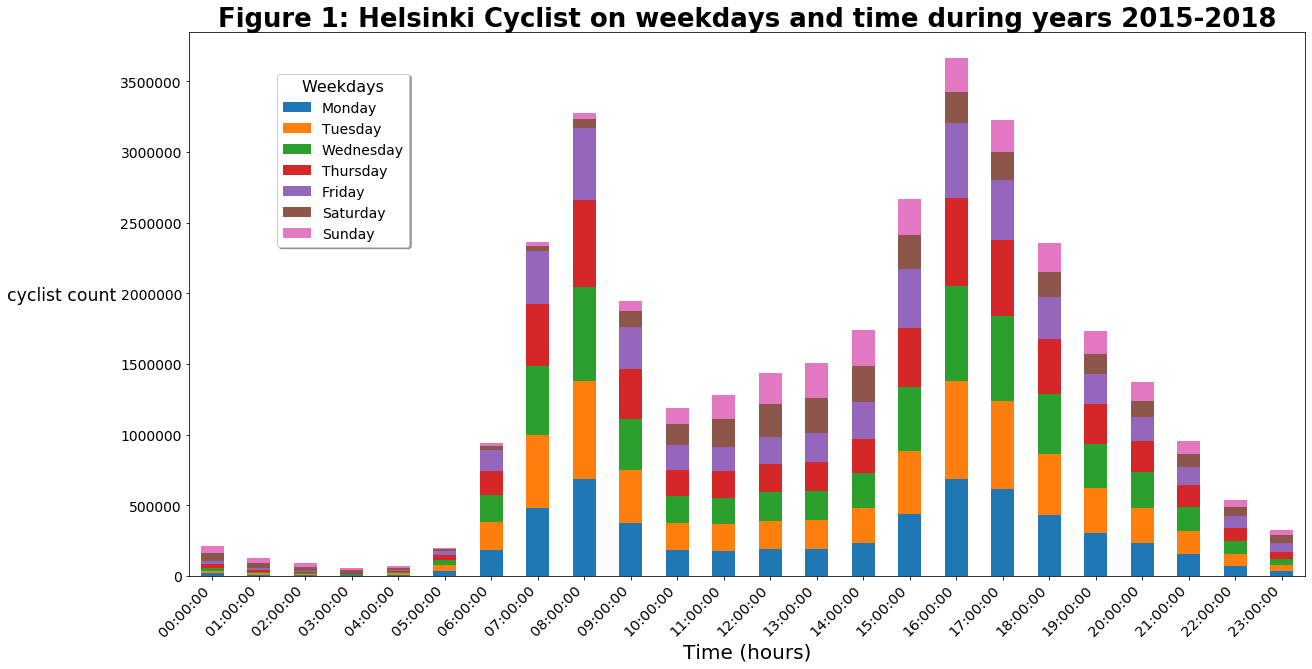

In [16]:
#
# release index so that tables can be merger together
#
Mon_days_gb_H = Mon_days_H_gb.reset_index()
Tue_days_gb_H = Tue_days_H_gb.reset_index()
Wed_days_gb_H = Wed_days_H_gb.reset_index()
Thu_days_gb_H = Thu_days_H_gb.reset_index()
Fri_days_gb_H = Fri_days_H_gb.reset_index()
Sat_days_gb_H = Sat_days_H_gb.reset_index()
Sun_days_gb_H = Sun_days_H_gb.reset_index()
#
# rename column name from 0 to Manday
#
Mon_days_gb_H = Mon_days_gb_H.rename({0: 'Monday'}, axis=1)
Tue_days_gb_H = Tue_days_gb_H.rename({0: 'Tuesday'}, axis=1)
Wed_days_gb_H = Wed_days_gb_H.rename({0: 'Wednesday'}, axis=1)
Thu_days_gb_H = Thu_days_gb_H.rename({0: 'Thursday'}, axis=1)
Fri_days_gb_H = Fri_days_gb_H.rename({0: 'Friday'}, axis=1)
Sat_days_gb_H = Sat_days_gb_H.rename({0: 'Saturday'}, axis=1)
Sun_days_gb_H = Sun_days_gb_H.rename({0: 'Sunday'}, axis=1)

# lets merge Mondays and Tuesdays
HKI_week = pd.merge(Mon_days_gb_H, Tue_days_gb_H, how='left', on=['Time'])
# lets merge Wednesdays to HKI_week
HKI_week = pd.merge(HKI_week, Wed_days_gb_H, how='left', on=['Time'])
# lets merge Thursdays to HKI_week
HKI_week = pd.merge(HKI_week, Thu_days_gb_H, how='left', on=['Time'])
# lets merge Fridays to HKI_week
HKI_week = pd.merge(HKI_week, Fri_days_gb_H, how='left', on=['Time'])
# lets merge Saturdays to HKI_week
HKI_week = pd.merge(HKI_week, Sat_days_gb_H, how='left', on=['Time'])
# lets merge Sundays to final HKI_week
HKI_week = pd.merge(HKI_week, Sun_days_gb_H, how='left', on=['Time'])
#
# Do bar plot from all Helsinki cyclists
#
HKI_week.plot(kind='bar', stacked=True, figsize=(20,10),rot=0,fontsize=14);
plt.title('Figure 1: Helsinki Cyclist on weekdays and time during years 2015-2018', fontsize=26, c='black',weight='semibold')
plt.legend(title='Weekdays', title_fontsize=16, bbox_to_anchor=(0.21, 0.95), borderaxespad=1.0, fontsize=14, shadow=True, columnspacing=4.0, fancybox =True)
plt.ylabel('cyclist count', rotation=0, fontsize='xx-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=20)
y_pos = np.arange(len(HKI_week.Time))
plt.xticks(y_pos, HKI_week.Time, rotation=45, horizontalalignment='right', fontsize='x-large')
# show plotting
plt.show()

### Combine Vantaa data together and show bar chart of Vantaa cyclists to comparing to total bar chart

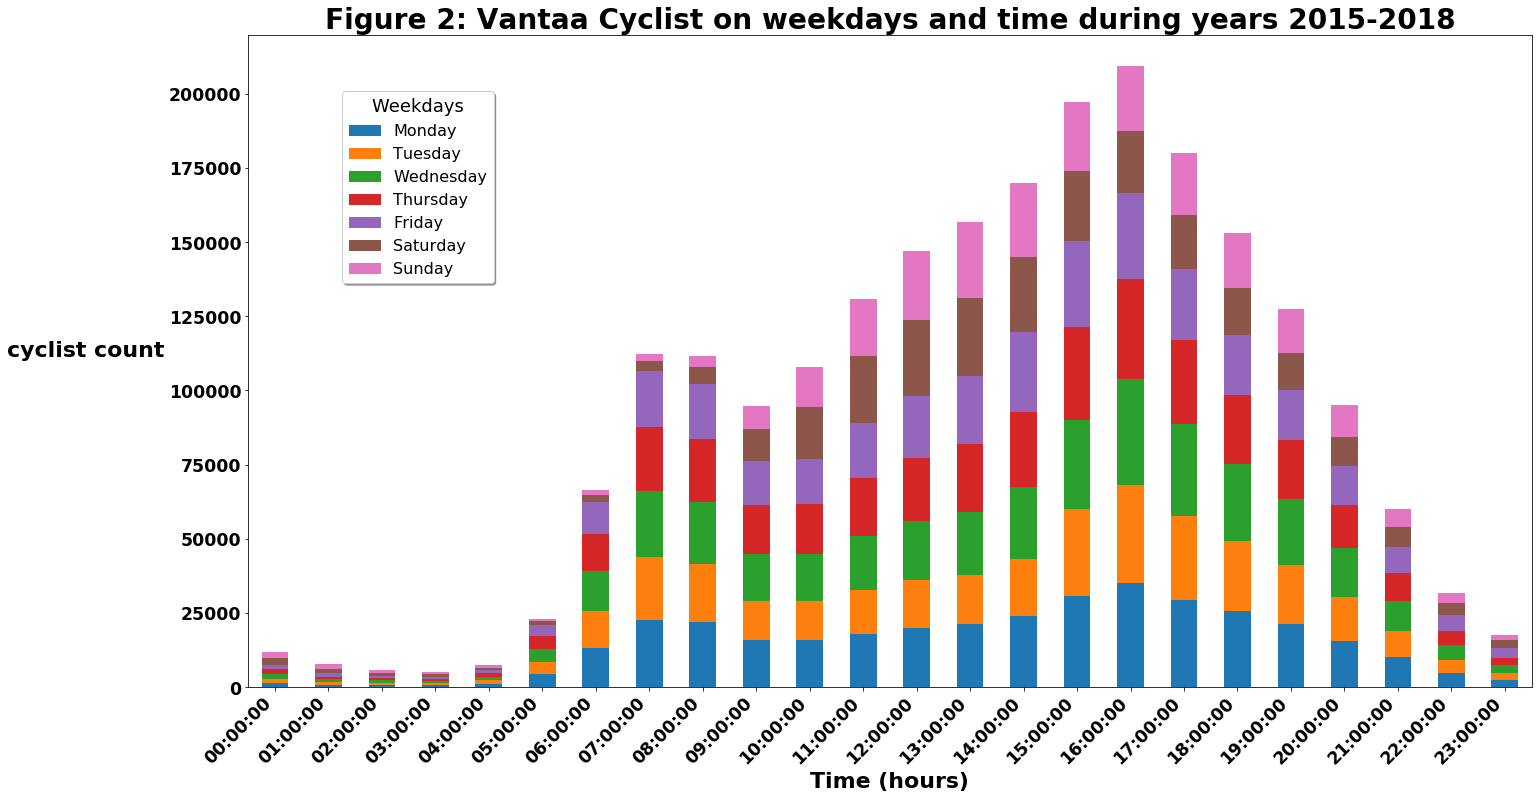

In [17]:
#
# release index so that tables can be merger together
#
Mon_days_gb_V = Mon_days_V_gb.reset_index()
Tue_days_gb_V = Tue_days_V_gb.reset_index()
Wed_days_gb_V = Wed_days_V_gb.reset_index()
Thu_days_gb_V = Thu_days_V_gb.reset_index()
Fri_days_gb_V = Fri_days_V_gb.reset_index()
Sat_days_gb_V = Sat_days_V_gb.reset_index()
Sun_days_gb_V = Sun_days_V_gb.reset_index()
#
# rename column name from 0 to Manday
#
Mon_days_gb_V = Mon_days_gb_V.rename({0: 'Monday'}, axis=1)
Tue_days_gb_V = Tue_days_gb_V.rename({0: 'Tuesday'}, axis=1)
Wed_days_gb_V = Wed_days_gb_V.rename({0: 'Wednesday'}, axis=1)
Thu_days_gb_V = Thu_days_gb_V.rename({0: 'Thursday'}, axis=1)
Fri_days_gb_V = Fri_days_gb_V.rename({0: 'Friday'}, axis=1)
Sat_days_gb_V = Sat_days_gb_V.rename({0: 'Saturday'}, axis=1)
Sun_days_gb_V = Sun_days_gb_V.rename({0: 'Sunday'}, axis=1)

# lets merge Mondays and Tuesdays
Vantaa_week = pd.merge(Mon_days_gb_V, Tue_days_gb_V, how='left', on=['Time'])
# lets merge Wednesdays to Vantaa_week
Vantaa_week = pd.merge(Vantaa_week, Wed_days_gb_V, how='left', on=['Time'])
# lets merge Thursdays to Vantaa_week
Vantaa_week = pd.merge(Vantaa_week, Thu_days_gb_V, how='left', on=['Time'])
# lets merge Fridays to Vantaa_week
Vantaa_week = pd.merge(Vantaa_week, Fri_days_gb_V, how='left', on=['Time'])
# lets merge Saturdays to Vantaa_week
Vantaa_week = pd.merge(Vantaa_week, Sat_days_gb_V, how='left', on=['Time'])
# lets merge Sundays to final Vantaa_week
Vantaa_week = pd.merge(Vantaa_week, Sun_days_gb_V, how='left', on=['Time'])
#
# Do bar plot from all Vantaa cyclists
#
Vantaa_week.plot(kind='bar', stacked=True, figsize=(23,12),rot=0,fontsize=14);
plt.title('Figure 2: Vantaa Cyclist on weekdays and time during years 2015-2018', fontsize=28, c='black',weight='semibold')
plt.legend(title='Weekdays', title_fontsize=18, bbox_to_anchor=(0.21, 0.95), borderaxespad=1.5, fontsize=16, shadow=True, columnspacing=4.5, fancybox =True)
plt.ylabel('cyclist count', rotation=0, fontsize=22, horizontalalignment='right',weight='semibold')
plt.xlabel('Time (hours)', rotation=0, fontsize=22,weight='semibold')
y_pos = np.arange(len(Vantaa_week.Time))
plt.xticks(y_pos, Vantaa_week.Time, rotation=45, horizontalalignment='right', fontsize='xx-large',weight='semibold')
plt.yticks(fontsize='xx-large',weight='semibold')
# show plotting
plt.show()

### Combine Espoo data together and show bar chart of Espoo cyclists to comparing to total bar chart

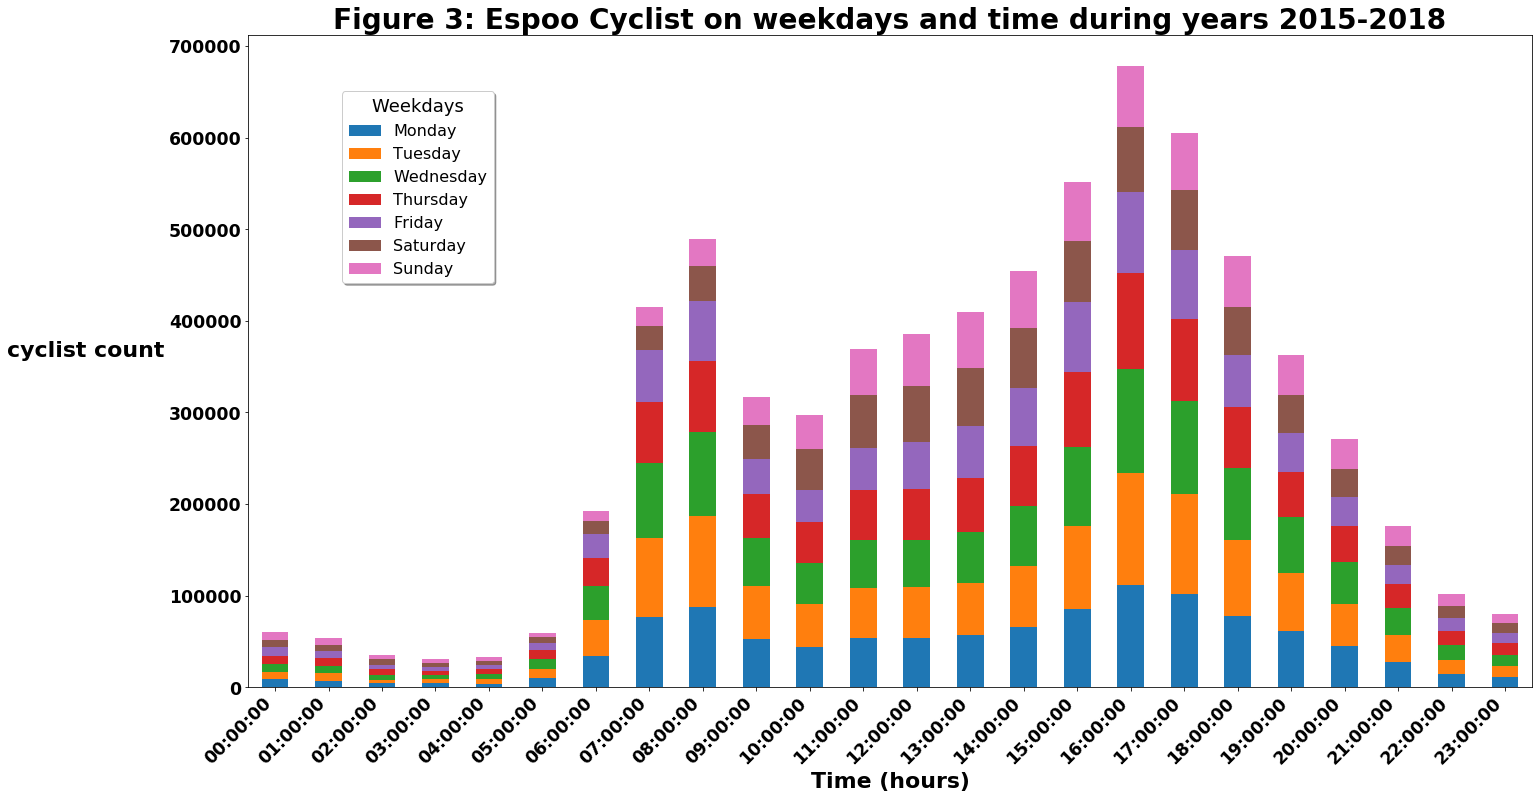

In [18]:
#
# release index so that tables can be merger together
#
Mon_days_gb_E = Mon_days_E_gb.reset_index()
Tue_days_gb_E = Tue_days_E_gb.reset_index()
Wed_days_gb_E = Wed_days_E_gb.reset_index()
Thu_days_gb_E = Thu_days_E_gb.reset_index()
Fri_days_gb_E = Fri_days_E_gb.reset_index()
Sat_days_gb_E = Sat_days_E_gb.reset_index()
Sun_days_gb_E = Sun_days_E_gb.reset_index()
#
# rename column name from 0 to Manday
#
Mon_days_gb_E = Mon_days_gb_E.rename({0: 'Monday'}, axis=1)
Tue_days_gb_E = Tue_days_gb_E.rename({0: 'Tuesday'}, axis=1)
Wed_days_gb_E = Wed_days_gb_E.rename({0: 'Wednesday'}, axis=1)
Thu_days_gb_E = Thu_days_gb_E.rename({0: 'Thursday'}, axis=1)
Fri_days_gb_E = Fri_days_gb_E.rename({0: 'Friday'}, axis=1)
Sat_days_gb_E = Sat_days_gb_E.rename({0: 'Saturday'}, axis=1)
Sun_days_gb_E = Sun_days_gb_E.rename({0: 'Sunday'}, axis=1)

# lets merge Mondays and Tuesdays
Espoo_week = pd.merge(Mon_days_gb_E, Tue_days_gb_E, how='left', on=['Time'])
# lets merge Wednesdays to Espoo_week
Espoo_week = pd.merge(Espoo_week, Wed_days_gb_E, how='left', on=['Time'])
# lets merge Thursdays to Espoo_week
Espoo_week = pd.merge(Espoo_week, Thu_days_gb_E, how='left', on=['Time'])
# lets merge Fridays to Espoo_week
Espoo_week = pd.merge(Espoo_week, Fri_days_gb_E, how='left', on=['Time'])
# lets merge Saturdays to Espoo_week
Espoo_week = pd.merge(Espoo_week, Sat_days_gb_E, how='left', on=['Time'])
# lets merge Sundays to Final Espoo_week
Espoo_week = pd.merge(Espoo_week, Sun_days_gb_E, how='left', on=['Time'])
#
# Do bar plot from all Espoo cyclists
#
Espoo_week.plot(kind='bar', stacked=True, figsize=(23,12),rot=0,fontsize=14);
plt.title('Figure 3: Espoo Cyclist on weekdays and time during years 2015-2018', fontsize=28, c='black',weight='semibold')
plt.legend(title='Weekdays', title_fontsize=18, bbox_to_anchor=(0.21, 0.95), borderaxespad=1.5, fontsize=16, shadow=True, columnspacing=4.5, fancybox =True)
plt.ylabel('cyclist count', rotation=0, fontsize=22, horizontalalignment='right',weight='semibold')
plt.xlabel('Time (hours)', rotation=0, fontsize=22,weight='semibold')
y_pos = np.arange(len(Espoo_week.Time))
plt.xticks(y_pos, Espoo_week.Time, rotation=45, horizontalalignment='right', fontsize='xx-large',weight='semibold')
plt.yticks(fontsize='xx-large',weight='semibold')
# show plotting
plt.show()

### Combine all cities data together and show bar chart of all cyclists by weekdays and time

At this point I wanted see if cyclists behavior change depending  on different days of week.

#### Cyclists on Mondays

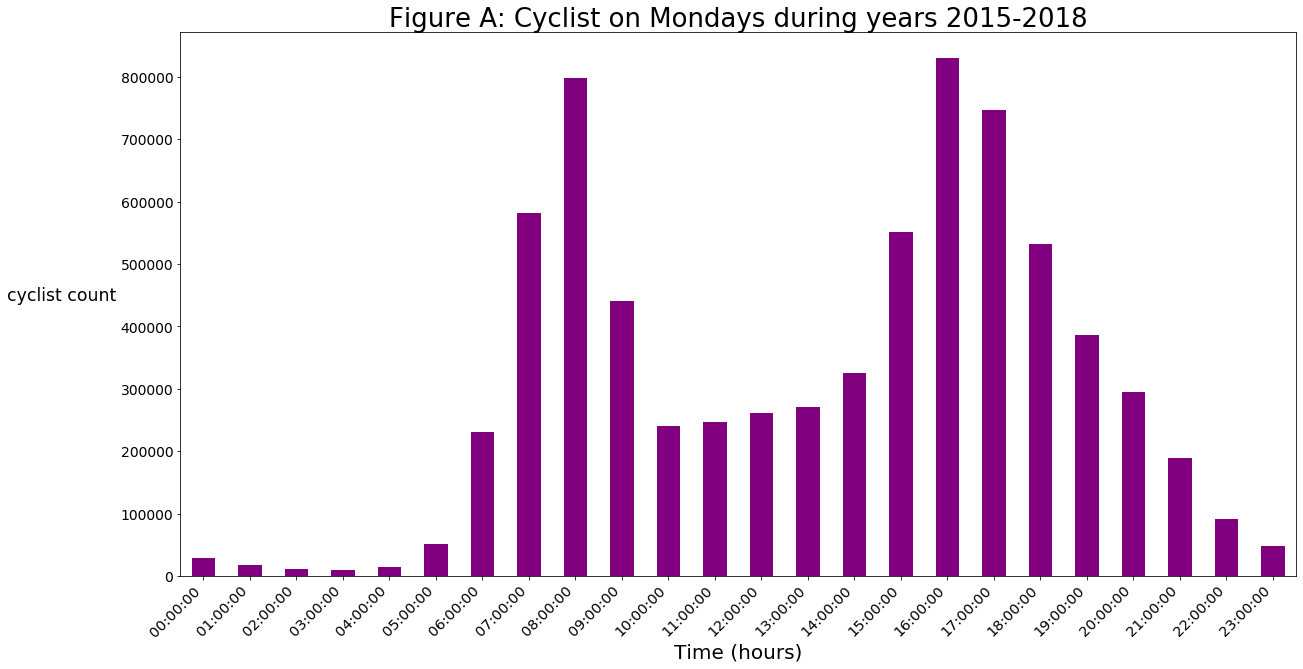

In [19]:
# 
# Merge Mondays together
#
Mondays_total = pd.concat([Mon_days_H_gb, Mon_days_V_gb, Mon_days_E_gb], axis=1)
#
# Combine all Mondays measurement points together (sum of them)
#
Mondays_total = Mondays_total.sum(axis=1)
#
# Do bar plot from all cyclists
#
Mondays_total.plot(kind='bar', stacked=True, figsize=(20,10),rot=0,fontsize=14,color='purple');
plt.title('Figure A: Cyclist on Mondays during years 2015-2018', fontsize=26, c='black')
plt.ylabel('cyclist count', rotation=0, fontsize='xx-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=20)
y_pos = np.arange(len(Mondays_total.index))
plt.xticks(y_pos, Mondays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
# show plotting
plt.show()

#### Cyclists on Tuesdays

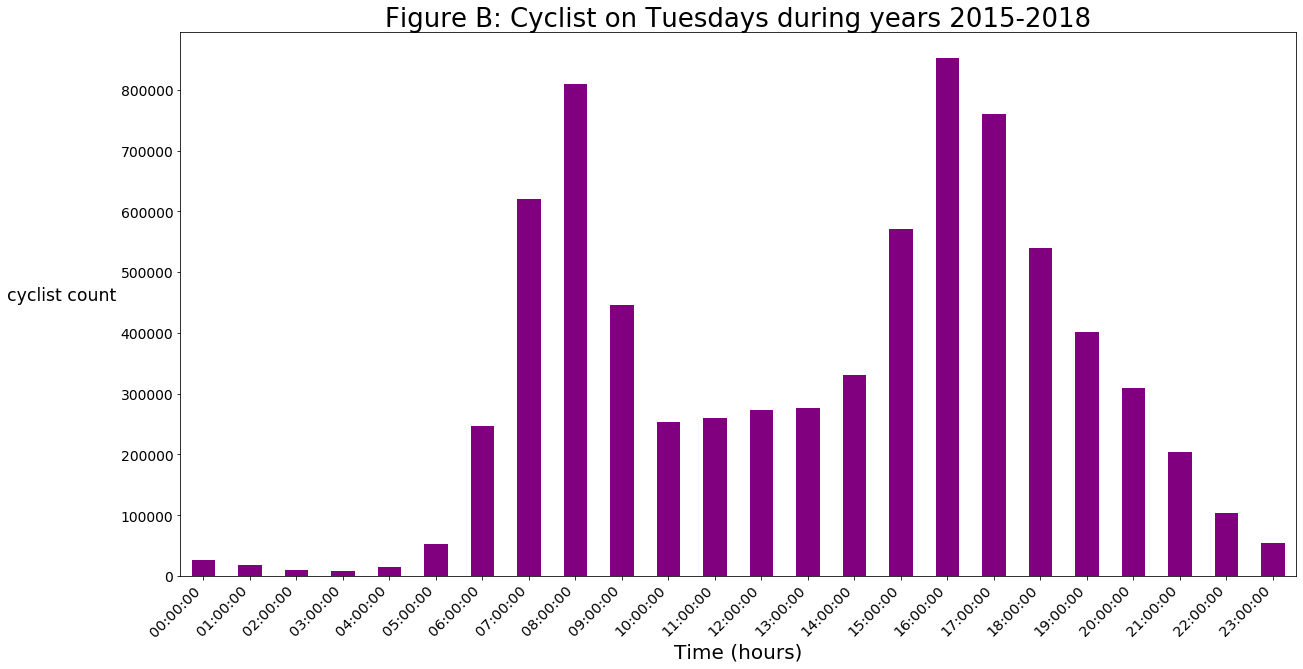

In [20]:
#
# Merge Tuesdays together
#
Tuesdays_total = pd.concat([Tue_days_H_gb, Tue_days_V_gb, Tue_days_E_gb], axis=1)
#
# Combine all Tuesdays measurement points together (sum of them)
#
Tuesdays_total = Tuesdays_total.sum(axis=1)
#
# Do bar plot from all cyclists, this plot is for PowerrPoint presentation
#
Tuesdays_total.plot(kind='bar', stacked=True, figsize=(20,10),rot=0,fontsize=14,color='purple');
plt.title('Figure B: Cyclist on Tuesdays during years 2015-2018', fontsize=26, c='black')
plt.ylabel('cyclist count', rotation=0, fontsize='xx-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=20)
y_pos = np.arange(len(Tuesdays_total.index))
plt.xticks(y_pos, Tuesdays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
# show plotting
plt.show()

#### Cyclists on Wednesdays

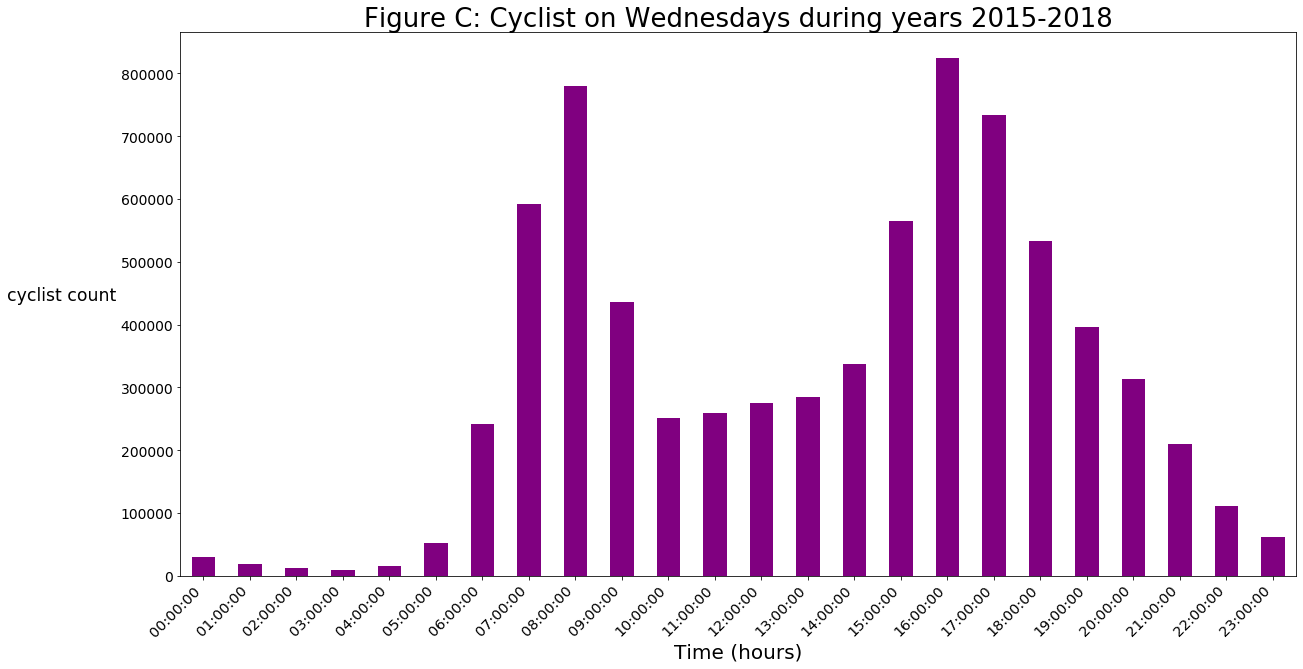

In [21]:
#
# Merge Wednesdays together
#
Wednesdays_total = pd.concat([Wed_days_H_gb, Wed_days_V_gb, Wed_days_E_gb], axis=1)
#
# Combine all Wednesdays measurement points together (sum of them)
#
Wednesdays_total = Wednesdays_total.sum(axis=1)
#
# Do bar plot from all cyclists, this plot is for PowerrPoint presentation
#
Wednesdays_total.plot(kind='bar', stacked=True, figsize=(20,10),rot=0,fontsize=14,color='purple');
plt.title('Figure C: Cyclist on Wednesdays during years 2015-2018', fontsize=26, c='black')
plt.ylabel('cyclist count', rotation=0, fontsize='xx-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=20)
y_pos = np.arange(len(Wednesdays_total.index))
plt.xticks(y_pos, Wednesdays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
# show plotting
plt.show()

#### Cyclists on Thursdays

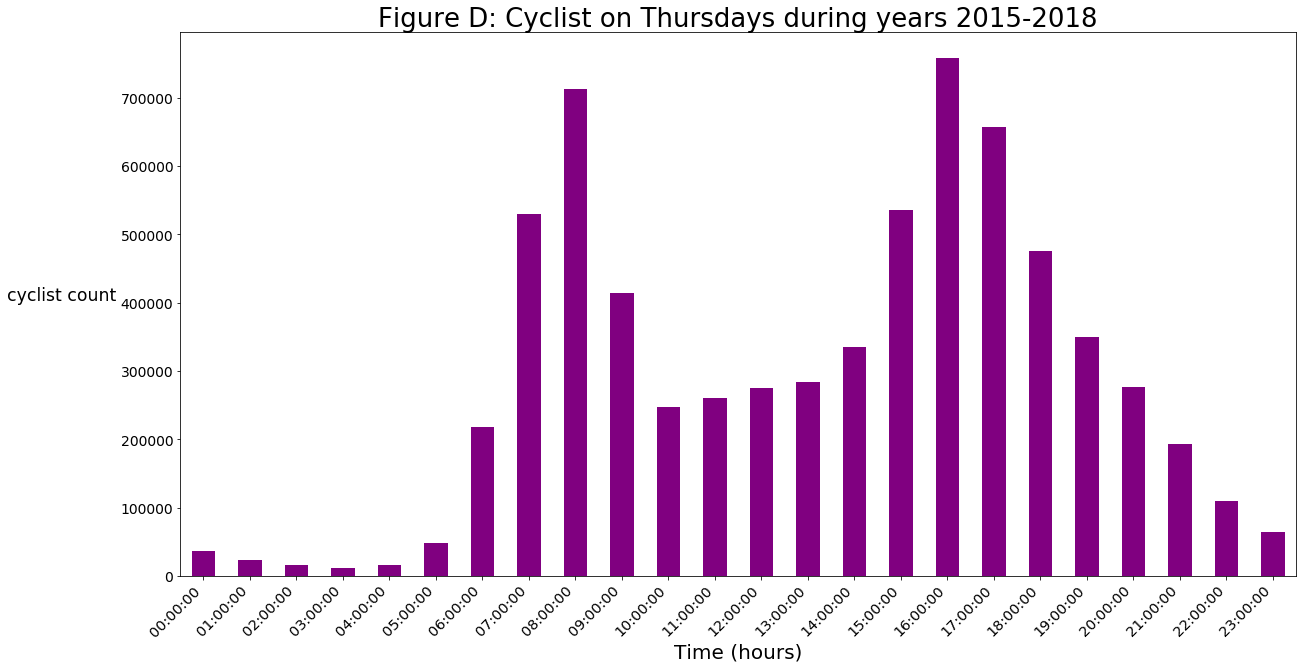

In [22]:
#
# Merge Thursdays together
#
Thursdays_total = pd.concat([Thu_days_H_gb, Thu_days_V_gb, Thu_days_E_gb], axis=1)
#
# Combine all Thursdays measurement points together (sum of them)
#
Thursdays_total = Thursdays_total.sum(axis=1)
#
# Do bar plot from all cyclists, this plot is for PowerrPoint presentation
#
Thursdays_total.plot(kind='bar', stacked=True, figsize=(20,10),rot=0,fontsize=14,color='purple');
plt.title('Figure D: Cyclist on Thursdays during years 2015-2018', fontsize=26, c='black')
plt.ylabel('cyclist count', rotation=0, fontsize='xx-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=20)
y_pos = np.arange(len(Thursdays_total.index))
plt.xticks(y_pos, Thursdays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
# show plotting
plt.show()

#### Cyclists on Fridays

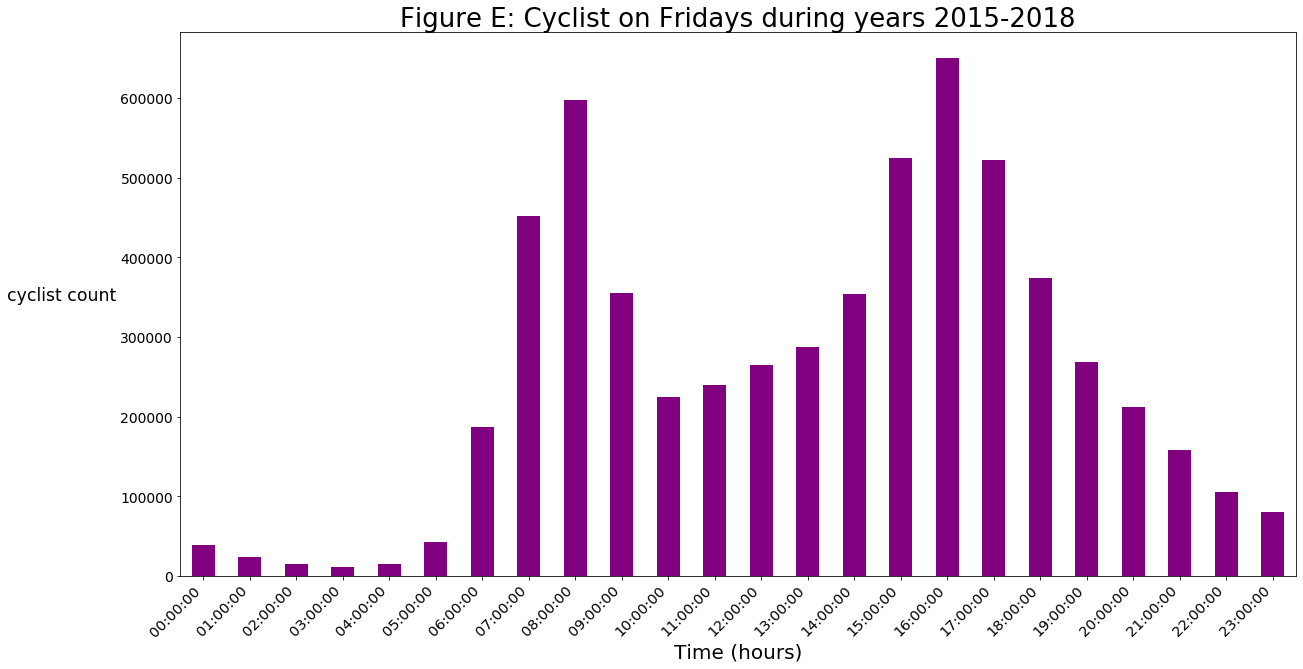

In [23]:
#
# Merge Fridays together
#
Fridays_total = pd.concat([Fri_days_H_gb, Fri_days_V_gb, Fri_days_E_gb], axis=1)
#
# Combine all Fridays measurement points together (sum of them)
#
Fridays_total = Fridays_total.sum(axis=1)
#
# Do bar plot from all cyclists, this plot is for PowerrPoint presentation
#
Fridays_total.plot(kind='bar', stacked=True, figsize=(20,10),rot=0,fontsize=14,color='purple');
plt.title('Figure E: Cyclist on Fridays during years 2015-2018', fontsize=26, c='black')
plt.ylabel('cyclist count', rotation=0, fontsize='xx-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=20)
y_pos = np.arange(len(Fridays_total.index))
plt.xticks(y_pos, Fridays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
# show plotting
plt.show()

#### Cyclists on Saturdays

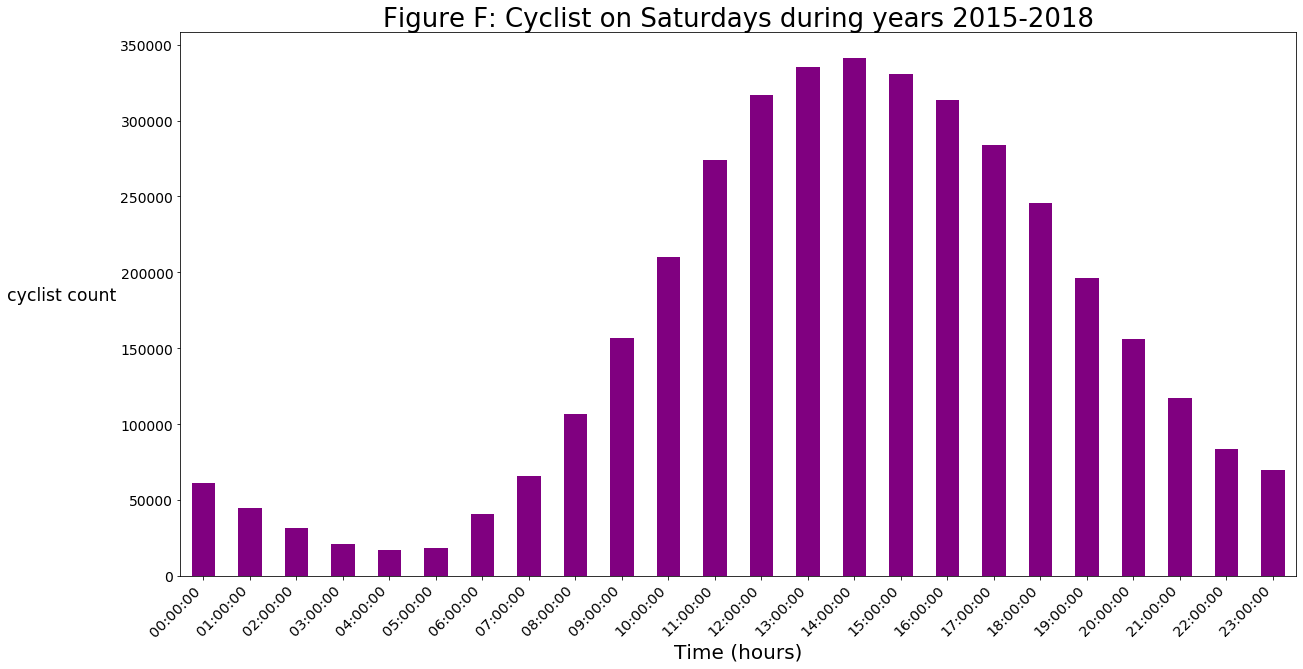

In [24]:
#
# Merge Saturdays together
#
Saturdays_total = pd.concat([Sat_days_H_gb, Sat_days_V_gb, Sat_days_E_gb], axis=1)
#
# Combine all Saturdays measurement points together (sum of them)
#
Saturdays_total = Saturdays_total.sum(axis=1)
#
# Do bar plot from all cyclists, this plot is for PowerrPoint presentation
#
Saturdays_total.plot(kind='bar', stacked=True, figsize=(20,10),rot=0,fontsize=14,color='purple');
plt.title('Figure F: Cyclist on Saturdays during years 2015-2018', fontsize=26, c='black')
plt.ylabel('cyclist count', rotation=0, fontsize='xx-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=20)
y_pos = np.arange(len(Saturdays_total.index))
plt.xticks(y_pos, Saturdays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
# show plotting
plt.show()

#### Cyclists on Sundays

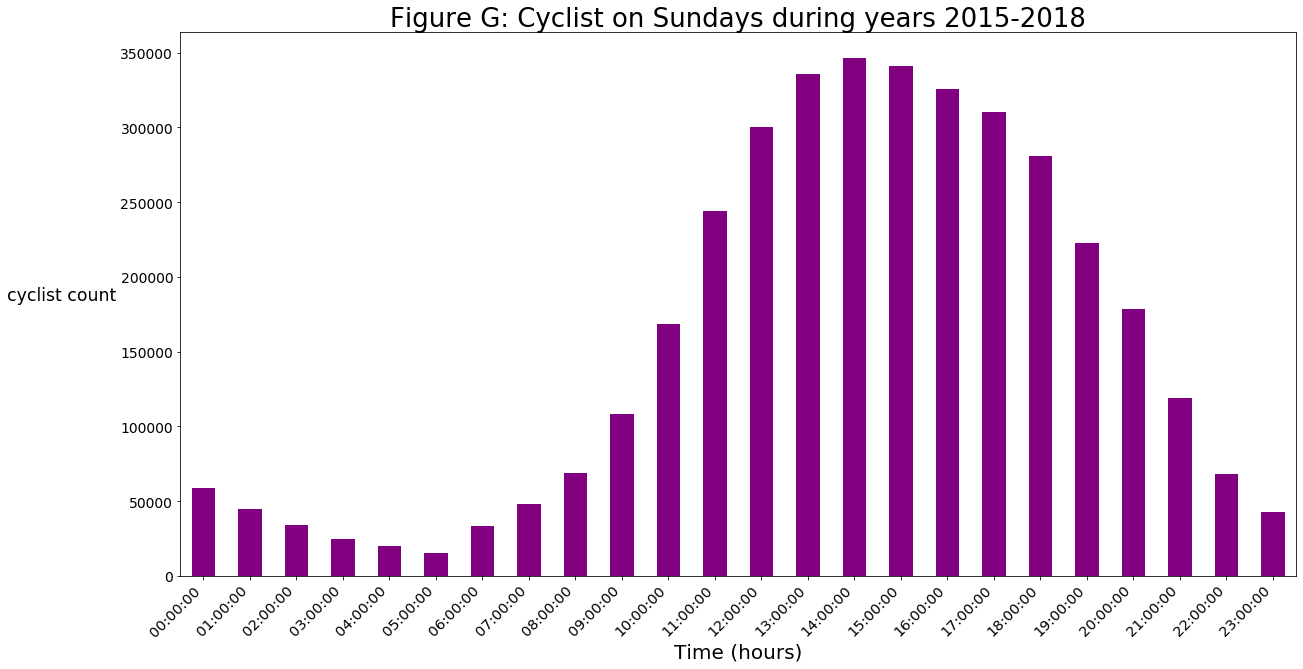

In [25]:
#
# Merge Sundays together
#
Sundays_total = pd.concat([Sun_days_H_gb, Sun_days_V_gb, Sun_days_E_gb], axis=1)
#
# Combine all Saturdays measurement points together (sum of them)
#
Sundays_total = Sundays_total.sum(axis=1)
#
# Do bar plot from all cyclists, this plot is for PowerrPoint presentation
#
Sundays_total.plot(kind='bar', stacked=True, figsize=(20,10),rot=0,fontsize=14,color='purple');
plt.title('Figure G: Cyclist on Sundays during years 2015-2018', fontsize=26, c='black')
plt.ylabel('cyclist count', rotation=0, fontsize='xx-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=20)
y_pos = np.arange(len(Sundays_total.index))
plt.xticks(y_pos, Sundays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
# show plotting
plt.show()

### merge all weekdays tables together and show final bar char for cyclists

Now all information merged together and final bar chart shown.

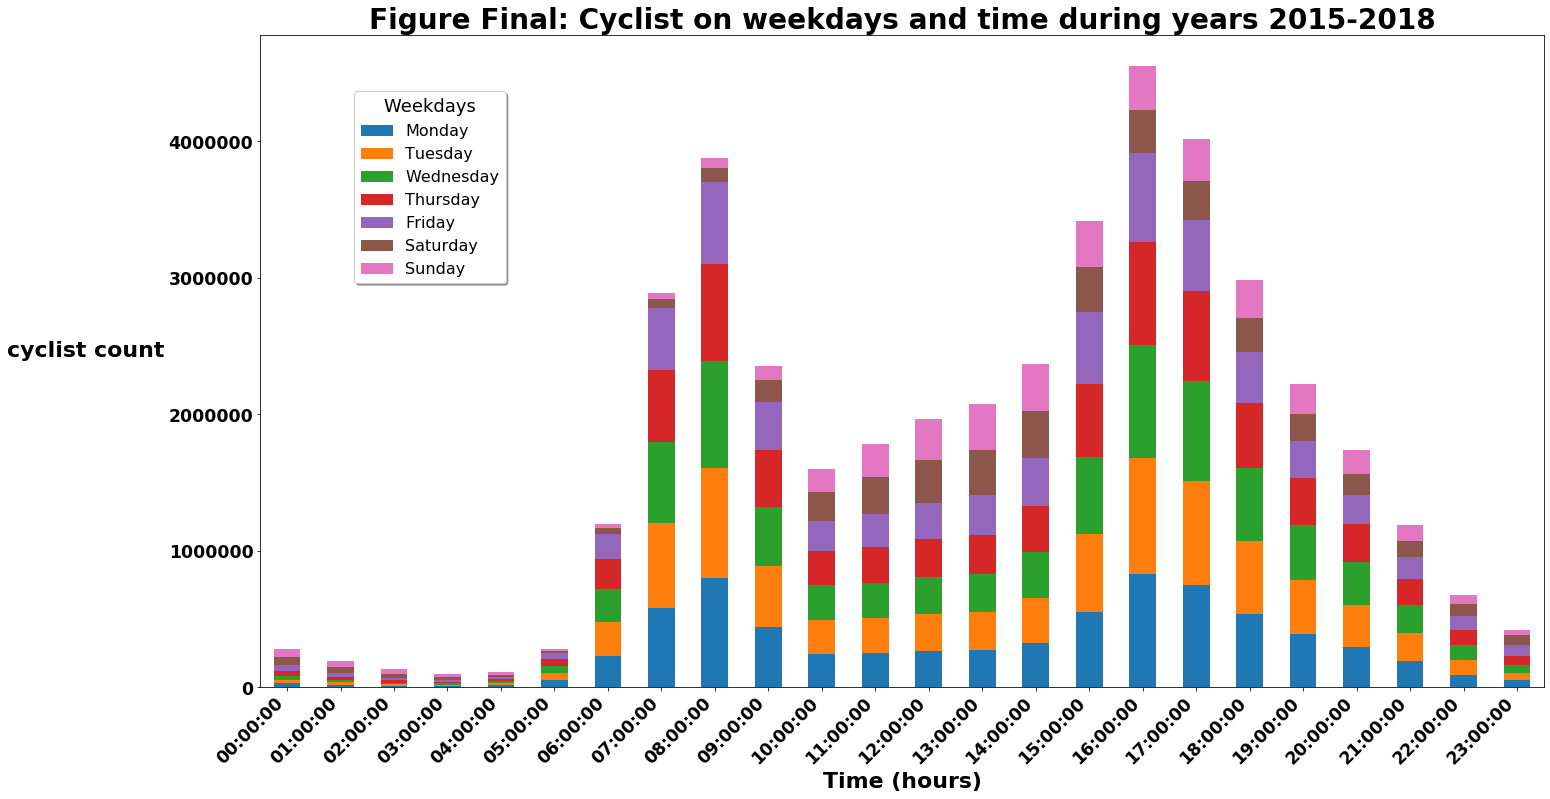

In [26]:
#
# Release index so that tables can be merger together
#
Mondays_total = Mondays_total.reset_index()
Tuesdays_total = Tuesdays_total.reset_index()
Wednesdays_total = Wednesdays_total.reset_index()
Thursdays_total = Thursdays_total.reset_index()
Fridays_total = Fridays_total.reset_index()
Saturdays_total = Saturdays_total.reset_index()
Sundays_total = Sundays_total.reset_index()
#
# Rename column names
#
Mondays_total = Mondays_total.rename({0: 'Monday'}, axis=1)
Tuesdays_total = Tuesdays_total.rename({0: 'Tuesday'}, axis=1)
Wednesdays_total = Wednesdays_total.rename({0: 'Wednesday'}, axis=1)
Thursdays_total = Thursdays_total.rename({0: 'Thursday'}, axis=1)
Fridays_total = Fridays_total.rename({0: 'Friday'}, axis=1)
Saturdays_total = Saturdays_total.rename({0: 'Saturday'}, axis=1)
Sundays_total = Sundays_total.rename({0: 'Sunday'}, axis=1)
#
# Merge Mondays and Tuesdays and create Week_Total DateFrame
#
Week_Total = pd.merge(Mondays_total, Tuesdays_total, how='left', on=['Time'])
#
# Merge Wednesdays to Week_Total
#
Week_Total = pd.merge(Week_Total, Wednesdays_total, how='left', on=['Time'])
#
# Merge Thursdays to Week_Total
#
Week_Total = pd.merge(Week_Total, Thursdays_total, how='left', on=['Time'])
#
# Merge Fridays to Week_Total
#
Week_Total = pd.merge(Week_Total, Fridays_total, how='left', on=['Time'])
#
# Merge Saturdays to Week_Total
#
Week_Total = pd.merge(Week_Total, Saturdays_total, how='left', on=['Time'])
#
# Merge Sundays to final Week_Total
#
Week_Total = pd.merge(Week_Total, Sundays_total, how='left', on=['Time'])
#
# Do bar plot from all cyclists
#
Week_Total.plot(kind='bar', stacked=True, figsize=(23,12),rot=0,fontsize=14);
plt.title('Figure Final: Cyclist on weekdays and time during years 2015-2018', fontsize=28, c='black',weight='semibold')
plt.legend(title='Weekdays', title_fontsize=18, bbox_to_anchor=(0.21, 0.95), borderaxespad=1.5, fontsize=16, shadow=True, columnspacing=4.5, fancybox =True)
plt.ylabel('cyclist count', rotation=0, fontsize=22, horizontalalignment='right',weight='semibold')
plt.xlabel('Time (hours)', rotation=0, fontsize=22,weight='semibold')
y_pos = np.arange(len(Week_Total.Time))
plt.xticks(y_pos, Week_Total.Time, rotation=45, horizontalalignment='right', fontsize='xx-large',weight='semibold')
plt.yticks(fontsize='xx-large',weight='semibold')
# show plotting
plt.show()

## Analysis

There are clear spikes in cycling numbers during the morning and afternoon rush hour in Helsinki and Espoo.

However it is different situation Vantaa cycling pattern is during weekdays. It seems in Vantaa bikes are used more evenly during a day then in Helsinki and Espoo.


## Conclusion

Even when all three cities cyclists number is added together their are very clear pattern emerged during rush hours. Based on this people clearly uses bikes to commute between home and work.

It is clear that cycling trend is to use bicycles to commute between home and work.